In [131]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def SIRDC_ODE_simulation(N,beta,gamma,theta,delta,T,I0):
    """
    An ODE simulation that model time dependent variables: S, I, R, D, C
    
    N: N individuals the population has
    
    beta: a fixed number of interactions that spread the disease per day per infected individual
    
    gamma: a Poisson rate of infectiousness resolves
    
    theta: a fixed fraction of people exiting the resolving state
    
    delta: a fixed fraction of the resolved consequences being died per day
    
    T: simulation time period
    
    I0: Initial number of infectious and unquarantined individuals
    
    """
    def f(t, v):
        
        """
        v = [S, I, R, D, C]
        
        """
        dSdt = - (beta * v[0] * v[1]) / N
        dIdt = (beta * v[0] * v[1]) / N - gamma * v[1]
        dRdt = gamma * v[1] - theta * v[2]
        dDdt = delta * theta * v[2]
        dCdt = (1 - delta) * theta * v[2]
        return [dSdt, dIdt, dRdt, dDdt, dCdt]
    
    def equil_state(t, v):
        return (beta * v[0] * v[1]) / N - 1
    
    v0 = [(N-I0), I0, 0, 0, 0]
    t_span = [0,T]
    t_eval = list(range(T))
    sol = solve_ivp(f, t_span, v0, t_eval=t_eval, events=equil_state)
    return sol

In [132]:
beta_list = [0.8, 1.5, 8]
gamma_list = [0.15, 0.5, 0.6]
delta_list = [0.1, 0.2, 0.3]
theta_list = [0.01, 0.1, 0.5]

N = 10000
T = 100
I0 = 10

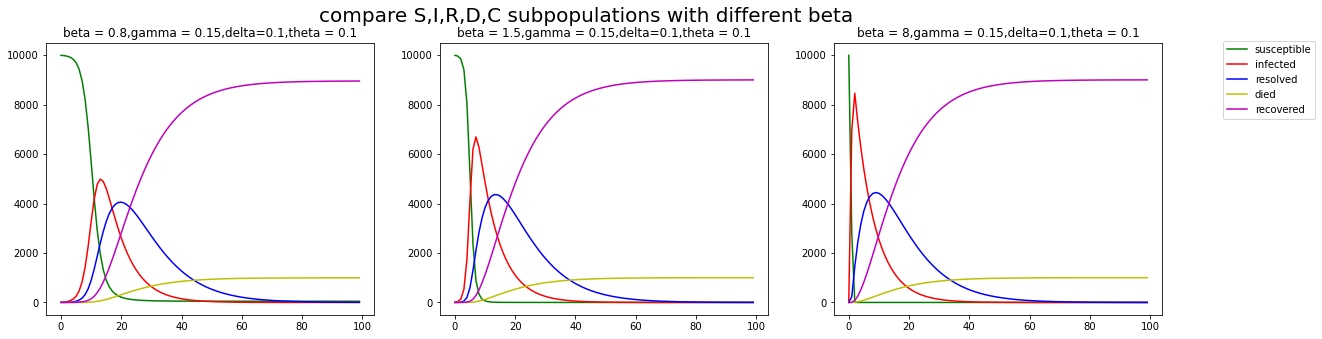

In [133]:
m, n = 1,3 # rows, columns of subplots
fig, ax = plt.subplots(m,n, figsize=(20,5))
fig.suptitle("compare S,I,R,D,C subpopulations with different beta", fontsize=20)

equil_state_list = []
for i,beta in enumerate(beta_list):
    gamma = gamma_list[0]
    delta = delta_list[0]
    theta = theta_list[1]
    sol = SIRDC_ODE_simulation(N,beta,gamma,theta,delta,T,I0)
    equil_state_day = int(np.ceil(sol.t_events))
    equil_state_S = int(sol.y[0][equil_state_day])
    equil_state_I = int(sol.y[1][equil_state_day])
    equil_state_R = int(sol.y[2][equil_state_day])
    equil_state_D = int(sol.y[3][equil_state_day])
    equil_state_C = int(N - equil_state_S - equil_state_I - equil_state_R - equil_state_D)
    equil_state_list.append([equil_state_day,equil_state_S,equil_state_I,equil_state_R,equil_state_D,equil_state_C])

    ax[i].plot(sol.t, sol.y[0], label="susceptible", c='g')
    ax[i].plot(sol.t, sol.y[1], label="infected", c='r')
    ax[i].plot(sol.t, sol.y[2], label="resolved", c='b')
    ax[i].plot(sol.t, sol.y[3], label="died", c='y')
    ax[i].plot(sol.t, sol.y[4], label="recovered", c='m')
    ax[i].set_title(f"beta = {beta_list[i]},gamma = {gamma},delta={delta},theta = {theta}")

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines,labels,bbox_to_anchor=(1.01, 0.9), loc = 'upper right')

In [134]:
for i in range(3):
    print('For beta =', beta_list[i], 
          ', on Day', equil_state_list[i][0],
          ', number of susceptibles stays constant at', equil_state_list[i][1],
          ', with number of infected to be', equil_state_list[i][2],
          ', number of resolved to be', equil_state_list[i][3],
          ', number of died to be', equil_state_list[i][4],
          'and number of recovered to be', equil_state_list[i][5])

For beta = 0.8 , on Day 38 , number of susceptibles stays constant at 54 , with number of infected to be 199 , number of resolved to be 1492 , number of died to be 825 and number of recovered to be 7430
For beta = 1.5 , on Day 17 , number of susceptibles stays constant at 2 , with number of infected to be 1729 , number of resolved to be 4067 , number of died to be 420 and number of recovered to be 3782
For beta = 8 , on Day 3 , number of susceptibles stays constant at 0 , with number of infected to be 7280 , number of resolved to be 2434 , number of died to be 28 and number of recovered to be 258


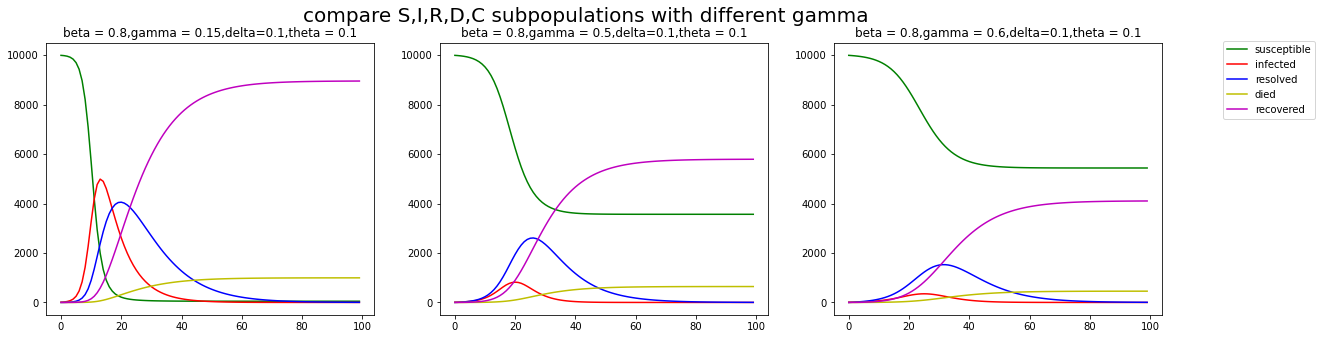

In [135]:
m, n = 1,3 # rows, columns of subplots
fig, ax = plt.subplots(m,n, figsize=(20,5))
fig.suptitle("compare S,I,R,D,C subpopulations with different gamma", fontsize=20)

equil_state_list = []
for i,gamma in enumerate(gamma_list):
    beta = beta_list[0]
    delta = delta_list[0]
    theta = theta_list[1]
    sol = SIRDC_ODE_simulation(N,beta,gamma,theta,delta,T,I0)
    equil_state_day = int(np.ceil(sol.t_events))
    equil_state_S = int(sol.y[0][equil_state_day])
    equil_state_I = int(sol.y[1][equil_state_day])
    equil_state_R = int(sol.y[2][equil_state_day])
    equil_state_D = int(sol.y[3][equil_state_day])
    equil_state_C = int(N - equil_state_S - equil_state_I - equil_state_R - equil_state_D)
    equil_state_list.append([equil_state_day,equil_state_S,equil_state_I,equil_state_R,equil_state_D,equil_state_C])

    ax[i].plot(sol.t, sol.y[0], label="susceptible", c='g')
    ax[i].plot(sol.t, sol.y[1], label="infected", c='r')
    ax[i].plot(sol.t, sol.y[2], label="resolved", c='b')
    ax[i].plot(sol.t, sol.y[3], label="died", c='y')
    ax[i].plot(sol.t, sol.y[4], label="recovered", c='m')
    ax[i].set_title(f"beta = {beta},gamma = {gamma_list[i]},delta={delta},theta = {theta}")

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines,labels,bbox_to_anchor=(1.01, 0.9), loc = 'upper right')

In [136]:
for i in range(3):
    print('For gamma =', gamma_list[i], 
          ', on Day', equil_state_list[i][0],
          ', number of susceptibles stays constant at', equil_state_list[i][1],
          ', with number of infected to be', equil_state_list[i][2],
          ', number of resolved to be', equil_state_list[i][3],
          ', number of died to be', equil_state_list[i][4],
          'and number of recovered to be', equil_state_list[i][5])

For gamma = 0.15 , on Day 38 , number of susceptibles stays constant at 54 , with number of infected to be 199 , number of resolved to be 1492 , number of died to be 825 and number of recovered to be 7430
For gamma = 0.5 , on Day 51 , number of susceptibles stays constant at 3568 , with number of infected to be 3 , number of resolved to be 424 , number of died to be 600 and number of recovered to be 5405
For gamma = 0.6 , on Day 63 , number of susceptibles stays constant at 5441 , with number of infected to be 2 , number of resolved to be 188 , number of died to be 436 and number of recovered to be 3933


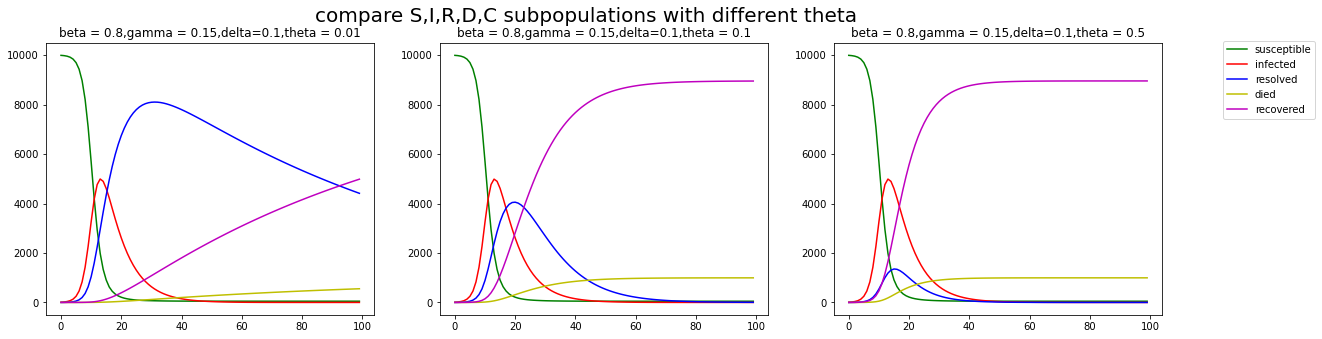

In [137]:
m, n = 1,3 # rows, columns of subplots
fig, ax = plt.subplots(m,n, figsize=(20,5))
fig.suptitle("compare S,I,R,D,C subpopulations with different theta", fontsize=20)

equil_state_list = []
for i,theta in enumerate(theta_list):
    beta = beta_list[0]
    delta = delta_list[0]
    gamma = gamma_list[0]
    sol = SIRDC_ODE_simulation(N,beta,gamma,theta,delta,T,I0)
    equil_state_day = int(np.ceil(sol.t_events))
    equil_state_S = int(sol.y[0][equil_state_day])
    equil_state_I = int(sol.y[1][equil_state_day])
    equil_state_R = int(sol.y[2][equil_state_day])
    equil_state_D = int(sol.y[3][equil_state_day])
    equil_state_C = int(N - equil_state_S - equil_state_I - equil_state_R - equil_state_D)
    equil_state_list.append([equil_state_day,equil_state_S,equil_state_I,equil_state_R,equil_state_D,equil_state_C])

    ax[i].plot(sol.t, sol.y[0], label="susceptible", c='g')
    ax[i].plot(sol.t, sol.y[1], label="infected", c='r')
    ax[i].plot(sol.t, sol.y[2], label="resolved", c='b')
    ax[i].plot(sol.t, sol.y[3], label="died", c='y')
    ax[i].plot(sol.t, sol.y[4], label="recovered", c='m')
    ax[i].set_title(f"beta = {beta},gamma = {gamma},delta={delta},theta = {theta_list[i]}")

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines,labels,bbox_to_anchor=(1.01, 0.9), loc = 'upper right')

In [138]:
for i in range(3):
    print('For theta =', theta_list[i], 
          ', on Day', equil_state_list[i][0],
          ', number of susceptibles stays constant at', equil_state_list[i][1],
          ', with number of infected to be', equil_state_list[i][2],
          ', number of resolved to be', equil_state_list[i][3],
          ', number of died to be', equil_state_list[i][4],
          'and number of recovered to be', equil_state_list[i][5])

For theta = 0.01 , on Day 38 , number of susceptibles stays constant at 55 , with number of infected to be 198 , number of resolved to be 7900 , number of died to be 184 and number of recovered to be 1663
For theta = 0.1 , on Day 38 , number of susceptibles stays constant at 54 , with number of infected to be 199 , number of resolved to be 1492 , number of died to be 825 and number of recovered to be 7430
For theta = 0.5 , on Day 38 , number of susceptibles stays constant at 54 , with number of infected to be 199 , number of resolved to be 84 , number of died to be 966 and number of recovered to be 8697


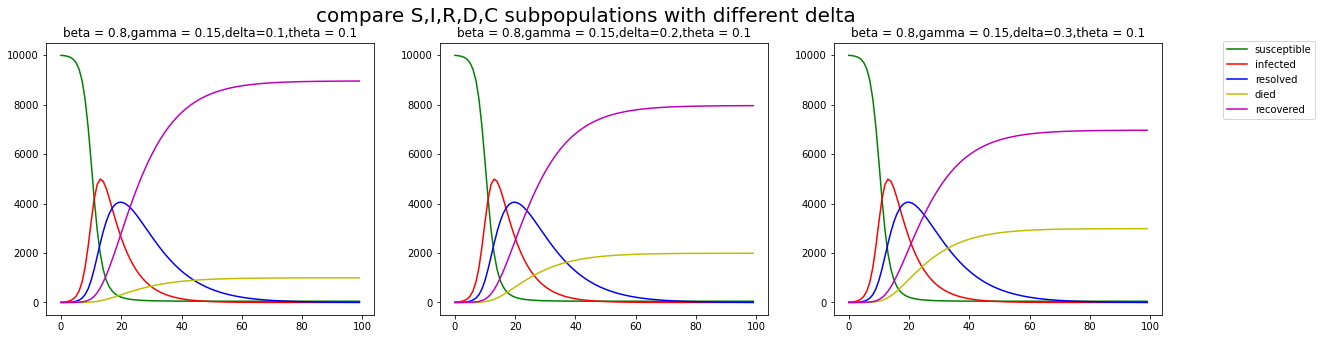

In [139]:
m, n = 1,3 # rows, columns of subplots
fig, ax = plt.subplots(m,n, figsize=(20,5))
fig.suptitle("compare S,I,R,D,C subpopulations with different delta", fontsize=20)

equil_state_list = []
for i,delta in enumerate(delta_list):
    beta = beta_list[0]
    theta = theta_list[1]
    gamma = gamma_list[0]
    sol = SIRDC_ODE_simulation(N,beta,gamma,theta,delta,T,I0)
    equil_state_day = int(np.ceil(sol.t_events))
    equil_state_S = int(sol.y[0][equil_state_day])
    equil_state_I = int(sol.y[1][equil_state_day])
    equil_state_R = int(sol.y[2][equil_state_day])
    equil_state_D = int(sol.y[3][equil_state_day])
    equil_state_C = int(N - equil_state_S - equil_state_I - equil_state_R - equil_state_D)
    equil_state_list.append([equil_state_day,equil_state_S,equil_state_I,equil_state_R,equil_state_D,equil_state_C])

    ax[i].plot(sol.t, sol.y[0], label="susceptible", c='g')
    ax[i].plot(sol.t, sol.y[1], label="infected", c='r')
    ax[i].plot(sol.t, sol.y[2], label="resolved", c='b')
    ax[i].plot(sol.t, sol.y[3], label="died", c='y')
    ax[i].plot(sol.t, sol.y[4], label="recovered", c='m')
    ax[i].set_title(f"beta = {beta},gamma = {gamma},delta={delta_list[i]},theta = {theta}")

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines,labels,bbox_to_anchor=(1.01, 0.9), loc = 'upper right')

In [140]:
for i in range(3):
    print('For theta =', theta_list[i], 
          ', on Day', equil_state_list[i][0],
          ', number of susceptibles stays constant at', equil_state_list[i][1],
          ', with number of infected to be', equil_state_list[i][2],
          ', number of resolved to be', equil_state_list[i][3],
          ', number of died to be', equil_state_list[i][4],
          'and number of recovered to be', equil_state_list[i][5])

For theta = 0.01 , on Day 38 , number of susceptibles stays constant at 54 , with number of infected to be 199 , number of resolved to be 1492 , number of died to be 825 and number of recovered to be 7430
For theta = 0.1 , on Day 38 , number of susceptibles stays constant at 54 , with number of infected to be 199 , number of resolved to be 1492 , number of died to be 1650 and number of recovered to be 6605
For theta = 0.5 , on Day 38 , number of susceptibles stays constant at 54 , with number of infected to be 199 , number of resolved to be 1492 , number of died to be 2476 and number of recovered to be 5779


Suppose now $\beta_t$ is a time-varying variable. If policies that can decrease the chances of interactions between people, like social distancing, are practiced, $\beta_t$ would be deminishing through time until slightly fluctuates around some constant number.

In [141]:
def SIRDC_time_varying_simulation(N,gamma,theta,delta,T,I0):
    """
    An ODE simulation that model time dependent variables: S, I, R, D, C
    
    N: N individuals the population has
    
    beta: a time varying number of interactions that spread the disease per infected individual
    
    gamma: a Poisson rate of infectiousness resolves
    
    theta: a fixed fraction of people exiting the resolving state
    
    delta: a fixed fraction of the resolved consequences being died per day
    
    T: simulation time period
    
    I0: Initial number of infectious and unquarantined individuals
    
    """
    def f(t, v):
        
        """
        v = [S, I, R, D, C, beta]
        
        """
        dbetadt = - np.exp(- N/v[1] - N*gamma/v[0]) 
        dSdt = - (v[5] * v[0] * v[1]) / N
        dIdt = (v[5] * v[0] * v[1]) / N - gamma * v[1]
        dRdt = gamma * v[1] - theta * v[2]
        dDdt = delta * theta * v[2]
        dCdt = (1 - delta) * theta * v[2]
        return [dSdt, dIdt, dRdt, dDdt, dCdt, dbetadt]
    
    def equil_state(t, v):
        return (v[5] * v[0] * v[1]) / N -1
    
    v0 = [(N-I0), I0, 0, 0, 0, 0.8]
    t_span = [0,T]
    t_eval = list(range(T))
    sol = solve_ivp(f, t_span, v0, t_eval=t_eval, events=equil_state)
    return sol

<ipython-input-141-1412d8cf642c>:26: RuntimeWarning: overflow encountered in exp
  dbetadt = - np.exp(- N/v[1] - N*gamma/v[0])
/opt/anaconda3/envs/pycourse/lib/python3.8/site-packages/scipy/integrate/_ivp/rk.py:109: RuntimeWarning: invalid value encountered in true_divide
  return norm(self._estimate_error(K, h) / scale)


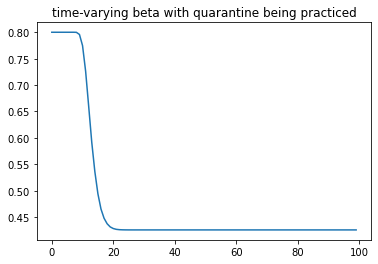

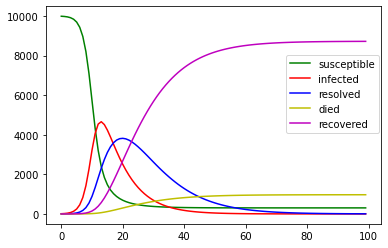

In [142]:
gamma = gamma_list[0]
delta = delta_list[0]
theta = theta_list[1]

sol = SIRDC_time_varying_simulation(N,gamma,theta,delta,T,I0)

plt.plot(sol.t, sol.y[5])
plt.title('time-varying beta with quarantine being practiced')
plt.show()
plt.plot(sol.t, sol.y[0], label="susceptible", c='g')
plt.plot(sol.t, sol.y[1], label="infected", c='r')
plt.plot(sol.t, sol.y[2], label="resolved", c='b')
plt.plot(sol.t, sol.y[3], label="died", c='y')
plt.plot(sol.t, sol.y[4], label="recovered", c='m')
plt.legend(bbox_to_anchor=(1.01, 0.8), loc = 'upper right')

In [143]:
equil_state_list = []
equil_state_day = int(np.ceil(sol.t_events))
equil_state_S = int(sol.y[0][equil_state_day])
equil_state_I = int(sol.y[1][equil_state_day])
equil_state_R = int(sol.y[2][equil_state_day])
equil_state_D = int(sol.y[3][equil_state_day])
equil_state_C = int(N - equil_state_S - equil_state_I - equil_state_R - equil_state_D)
equil_state_list = [equil_state_day,equil_state_S,equil_state_I,equil_state_R,equil_state_D,equil_state_C]
print('On Day', equil_state_list[0],
      ', number of susceptibles stays constant at', equil_state_list[1],
      ', with number of infected to be', equil_state_list[2],
      ', number of resolved to be', equil_state_list[3],
      ', number of died to be', equil_state_list[4],
      'and number of recovered to be', equil_state_list[5])

On Day 47 , number of susceptibles stays constant at 311 , with number of infected to be 68 , number of resolved to be 717 , number of died to be 890 and number of recovered to be 8014
